# Winter 2015-16
12/22/2015 - 3/20/2016

In [77]:
from __future__ import print_function

import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [78]:
#data = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_151219.txt')
#data= data.rename(columns=lambda x: x.strip())
week_list = ['151219','151226','160102','160109','160116','160123','160130',
             '160206','160213','160220','160227','160305','160312','160319']
weeks = []
for week in random.sample(week_list,4):
    string = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + week + '.txt'
    weeks.append(pd.read_csv(string).rename(columns=lambda x: x.strip()))
    
data = pd.concat(weeks)
data = data.reset_index()

In [79]:
data

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456,BMT,02/20/2016,03:00:00,REGULAR,5551553,1873901
1,1,A002,R051,02-00-00,59 ST,NQR456,BMT,02/20/2016,07:00:00,REGULAR,5551567,1873919
2,2,A002,R051,02-00-00,59 ST,NQR456,BMT,02/20/2016,11:00:00,REGULAR,5551664,1873999
3,3,A002,R051,02-00-00,59 ST,NQR456,BMT,02/20/2016,15:00:00,REGULAR,5551960,1874072
4,4,A002,R051,02-00-00,59 ST,NQR456,BMT,02/20/2016,19:00:00,REGULAR,5552383,1874159
5,5,A002,R051,02-00-00,59 ST,NQR456,BMT,02/20/2016,23:00:00,REGULAR,5552655,1874197
6,6,A002,R051,02-00-00,59 ST,NQR456,BMT,02/21/2016,03:00:00,REGULAR,5552728,1874205
7,7,A002,R051,02-00-00,59 ST,NQR456,BMT,02/21/2016,07:00:00,REGULAR,5552740,1874217
8,8,A002,R051,02-00-00,59 ST,NQR456,BMT,02/21/2016,11:00:00,REGULAR,5552808,1874275
9,9,A002,R051,02-00-00,59 ST,NQR456,BMT,02/21/2016,15:00:00,REGULAR,5553058,1874347


In [80]:
data['DATETIME'] = pd.to_datetime(data.DATE + data.TIME, format='%m/%d/%Y%H:%M:%S')

In [81]:
data['HOUR'] = data.DATETIME.map(lambda x: x.hour)
data['PERIOD'] = data.HOUR // 4

In [82]:
data['dENTRIES'] = data.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff()
data['dEXITS'] = data.groupby(['C/A','UNIT','SCP','STATION']).EXITS.diff()

In [83]:
# Anything over 6000 is probably an error
data = data[data.dENTRIES >= 0]
data = data[data.dEXITS >= 0]
data = data[data.dENTRIES <= 6000]
data = data[data.dEXITS <= 6000]

data['FLUX'] = data.dENTRIES + data.dEXITS

In [84]:
data.describe()

,index,ENTRIES,EXITS,HOUR,PERIOD,dENTRIES,dEXITS,FLUX
count,768520.000000,7.685200e+05,7.685200e+05,768520.000000,768520.000000,768520.000000,768520.000000,768520.000000
mean,98238.492229,2.386814e+07,1.760474e+07,11.748282,2.505443,174.908087,131.414092,306.322179
std,56659.357349,1.467620e+08,1.239533e+08,6.871985,1.681984,267.989031,236.907554,403.566650
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49128.000000,5.633992e+05,2.914238e+05,7.000000,1.000000,9.000000,7.000000,28.000000
50%,98236.000000,2.476172e+06,1.450330e+06,11.000000,2.000000,68.000000,45.000000,152.000000
75%,147264.000000,6.256278e+06,4.443206e+06,19.000000,4.000000,233.000000,152.000000,434.000000
max,198883.000000,2.146697e+09,2.097160e+09,23.000000,5.000000,5997.000000,5848.000000,6323.000000


In [ ]:
times = data.groupby(['STATION','HOUR']).median()
times.FLUX.plot.barh()

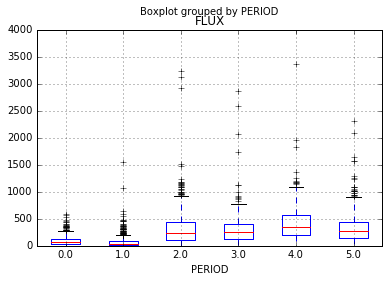

In [89]:
times.boxplot(column='FLUX',by='PERIOD')